In [1]:
#import dependencies
import pandas as pd
import preprocess

# Preprocessing

In [2]:
## Read the wisconsin dataset
breast_ca = pd.read_csv('Dataset/breast-cancer-wisconsin.data',index_col=None,header=None)

## Run clean_impute function on dataset and save dataset (impute - MICE method)
df_impute = preprocess.clean_impute(breast_ca)
df_impute.to_csv('Dataset/processed/breast-cancer-wisconsin-imputed.csv',index=False)

## Read imputed wisconsin dataset
df = pd.read_csv("Dataset/processed/breast-cancer-wisconsin-imputed.csv")

Columns renaming successful
All '?' values replaced with 'NaN'

Calculate missing values from dataframe
sample_id            0
cl_thcknss           0
size_cell_un         0
shape_cell_un        0
marg_adhesion        0
size_cell_single     0
bare_nucl           16
bl_chrmatn           0
nrml_nucleo          0
mitoses              0
class                0
dtype: int64

Null values imputated using Multivariate Imputation by Chained Equation (MICE) method

Calculate missing values from imputated dataframe
sample_id           0
cl_thcknss          0
size_cell_un        0
shape_cell_un       0
marg_adhesion       0
size_cell_single    0
bare_nucl           0
bl_chrmatn          0
nrml_nucleo         0
mitoses             0
class               0
dtype: int64



In [3]:
# Remove the sample_id column
df = df.drop(columns=['sample_id'])

# Split the dataset into features/variables (X) and labels/outcome (y)
X = df.drop(columns=['class'])
y = df['class'].apply(lambda x: 1 if x == 4 else 0)

# Logistic Regression

In [4]:
#Dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Scale the features - Min and Max scaling (sensitive to outliers)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Cross-Validation for small datasets to prevent biased and overfitting of model
loo = LeaveOneOut()

# Run supervised learning - Logistic Regression algorithm
model = LogisticRegression()

In [7]:
# LOO method use multiple observations of evaluation, hence need to initialize a list to store 'class' prediction and probability from all observations
predictions = []
probabilities = []

In [8]:
# Loop through the cross-validation splits/observations
for train_index, test_index in loo.split(X_scaled):
    # While splitting data into training and test sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data and predict the labels + probability for the test set
    model.fit(X_train,y_train)
    predicted_y = model.predict(X_test)
    probability_y = model.predict_proba(X_test)[:,1]

    # Append each predicted label and probability score into list
    predictions.append(predicted_y[0])
    probabilities.append(probability_y[0])

# Convert the lists to a Numpy Array
predictions = np.array(predictions)
probabilities = np.array(probabilities)

In [9]:
# Calculate false +ve rate, true +ve rate and threshold values
fpr, tpr, thresholds = roc_curve(y,probabilities)

# Calculate area under the curve
roc_auc = roc_auc_score(y,probabilities)

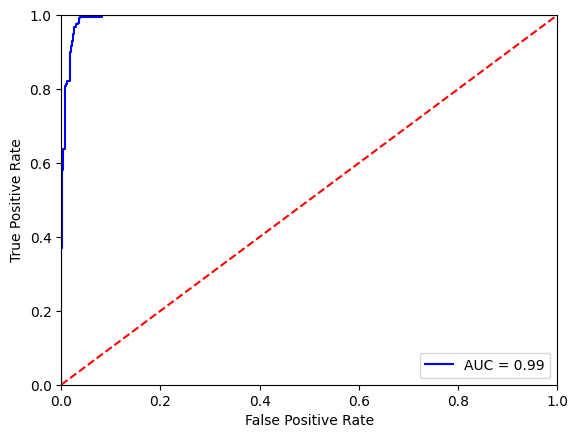

In [10]:
# Plot the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
# Calculate confusion matrix
conf_mtx = confusion_matrix(y,predictions)

<AxesSubplot: >

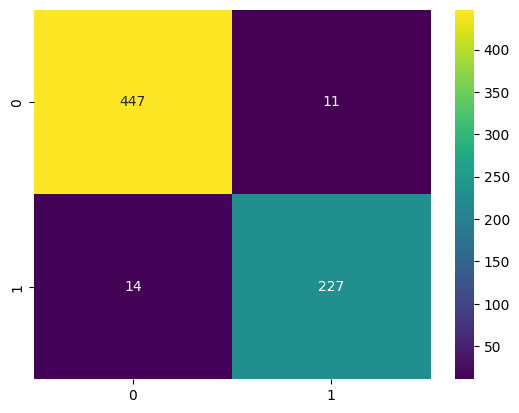

In [12]:
# Plot confusion matrix using Seaborn Heatmap
sns.heatmap(conf_mtx,annot=True,fmt='d',cmap='viridis')

In [13]:
# Comprehensive Classification Report
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       458
           1       0.95      0.94      0.95       241

    accuracy                           0.96       699
   macro avg       0.96      0.96      0.96       699
weighted avg       0.96      0.96      0.96       699



In [14]:
# Combine the true labels and predicted labels into a dataframe
df2 = pd.DataFrame({'Actual': y, 'Predicted': predictions})

In [15]:
df2

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
694,0,0
695,0,0
696,1,1
697,1,1
